<p style="text-align:center; font-size:3.3em; color:#AD7D67; line-height:5rem; font-style:italic; font-weight:700;">
    Projet N°4 : <br>
    Implémentation d'un modèle de scoring </p>
<p style="text-align:center; font-size:2.8em; color:#9EBEB8; line-height:4rem; font-style:italic; font-weight:700;">
    II - Feature Engineering
</p>

## Sommaire
1. [Introduction](#1-introduction)
2. [Préparation des données](#2-preparation-des-donnees)
3. [Création des features](#3.-Création-des-features)
   - [3.1. Ratio Dette/Revenu](#3.1.-Ratio-Dette/Revenu)
   - [3.2. Ratio Cedit/Emprunt](#3.2.-Ratio-Credit/Emprunt)
   - [3.3. Ratio Annuity/Credit](#3.3.-Ratio-Annuity/Credit)
4. [Analyse de pertinence](#4-analyse-de-pertinence)
5. [Sauvegarde des jeux de données](#5.-Sauvegarde-des-jeux-de-données)
6. [Conclusion](#5-conclusion)

## 1. Introduction

Dans ce notebook, nous nous concentrons sur la création de nouvelles variables pertinentes pour améliorer la prédiction du risque de défaut des clients dans le projet **N°4**.

## 2. Préparation des données

Avant de créer les nouvelles variables, nous vérifions que les données principales sont prêtes à être manipulées.

In [200]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
folder_path = "data" # A ajuster selon le chemin où se trouve vos cvs.

In [202]:
# Chargement des données
app_train = pd.read_csv(f"{folder_path}/cleaned_app_train.csv")
app_test = pd.read_csv(f"{folder_path}/cleaned_app_test.csv")
bureau_data = pd.read_csv(f"{folder_path}/bureau.csv")
previous_applications = pd.read_csv(f"{folder_path}/previous_application.csv")

# Exploration rapide
print("Aperçu des données principales :")
display(app_train.head())
print("Aperçu des données bureau :")
display(bureau_data.head())
print("Aperçu des données precedentes :")
display(previous_applications.head())

Aperçu des données principales :


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,nbr_enfants,TARGET
0,100002,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0.0,0.0,0.0,0.0,0.0,1.0,False,sans_enfant,1
1,100003,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Accompanied,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,sans_enfant,0
2,100004,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,sans_enfant,0
3,100006,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,sans_enfant,0
4,100007,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,sans_enfant,0


Aperçu des données bureau :


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Aperçu des données precedentes :


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
bureau_data.isna().mean().sort_values(ascending=False) * 100

AMT_ANNUITY               71.473490
AMT_CREDIT_MAX_OVERDUE    65.513264
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_DEBT       15.011932
DAYS_CREDIT_ENDDATE        6.149573
AMT_CREDIT_SUM             0.000757
SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_DAY_OVERDUE         0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
dtype: float64

In [204]:
# Suppression des variables avec valeurs manquantes à hauteur de 40%
var_to_drop = [var for var in bureau_data.columns if bureau_data[var].isnull().mean() > 0.4]
print(var_to_drop)

['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']


In [205]:
bureau_data.drop(labels=var_to_drop, axis=1, inplace=True)

In [206]:
previous_applications.isna().mean().sort_values(ascending=False) * 100

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_PREV                      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_ST

In [207]:
# Suppression des variables avec valeurs manquantes à hauteur de 20%
var_to_drop = [var for var in previous_applications.columns if previous_applications[var].isnull().mean() > 0.2]
print(var_to_drop)

['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [208]:
previous_applications.drop(labels=var_to_drop, axis=1, inplace=True)

## 3. Création des features

### 3.1. Ratio Dette/Revenu

Le ratio dette/revenu évalue la charge financière totale des clients en comparant leurs dettes totales à leurs revenus totaux.  Un ratio élevé peut indiquer un risque accru de défaut.

In [209]:
# Debt-to-Income Ratio
bureau_data['TOTAL_DEBT'] = bureau_data['AMT_CREDIT_SUM_DEBT'].fillna(0)
debt_summary = bureau_data.groupby('SK_ID_CURR')['TOTAL_DEBT'].sum().reset_index()

In [210]:
# Merge avec les données principales
app_train = app_train.merge(debt_summary, on='SK_ID_CURR', how='left')
app_train['TOTAL_DEBT'] = app_train['TOTAL_DEBT'].fillna(0)

# Calcul du ratio
app_train['DEBT_TO_INCOME_RATIO'] = app_train['TOTAL_DEBT'] / app_train['AMT_INCOME_TOTAL']

# On applique ce changement pour le dataset test
app_test = app_test.merge(debt_summary, on='SK_ID_CURR', how='left')
app_test['TOTAL_DEBT'] = app_train['TOTAL_DEBT'].fillna(0)
app_test['DEBT_TO_INCOME_RATIO'] = app_test['TOTAL_DEBT'] / app_test['AMT_INCOME_TOTAL']

display(app_train[['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'TOTAL_DEBT', 'DEBT_TO_INCOME_RATIO']].head())

,SK_ID_CURR,AMT_INCOME_TOTAL,TOTAL_DEBT,DEBT_TO_INCOME_RATIO
0,100002,202500.0,245781.0,1.213733
1,100003,270000.0,0.0,0.000000
2,100004,67500.0,0.0,0.000000
3,100006,135000.0,0.0,0.000000
4,100007,121500.0,0.0,0.000000


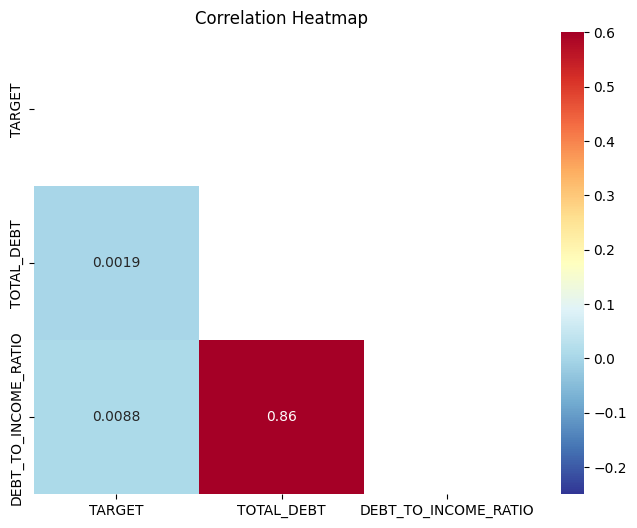

In [211]:
corrs = app_train[['TARGET', 'TOTAL_DEBT', 'DEBT_TO_INCOME_RATIO']].corr()
plt.figure(figsize = (8, 6))

mask = np.triu(np.ones_like(corrs, dtype=bool))

sns.heatmap(corrs, mask=mask, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Le heatmap montre que la corrélation entre **`TARGET`** et **`DEBT_TO_INCOME_RATIO`** (0.0088) est légèrement plus élevée que celle entre **`TARGET`** et **`TOTAL_DEBT`** (0.0019), ce qui suggère que la nouvelle variable est un peu plus pertinente pour prédire le risque de défaut.  

**`DEBT_TO_INCOME_RATIO`** capture davantage d'informations, car elle prend en compte le revenu en plus de la dette totale, offrant ainsi une perspective plus complète sur la capacité de paiement des clients.  

La forte corrélation entre **`DEBT_TO_INCOME_RATIO`** et **`TOTAL_DEBT`** (0.8649) indique qu’elle est étroitement liée à la dette, tout en apportant une dimension supplémentaire grâce à l’intégration du revenu.  

En conclusion, la nouvelle variable **`DEBT_TO_INCOME_RATIO`** est plus pertinente et plus utile pour modéliser le risque de défaut que la variable brute **`TOTAL_DEBT`**.

### 3.2. Ratio Credit/Emprunt

Cette nouvelle variable représente le ratio entre la somme des dettes restantes (ou des montants contractés) dans les précédentes demandes de prêt et le montant total demandé. Elle permet d'évaluer si les clients ont tendance à accumuler plus de dettes par rapport à leurs demandes initiales.

In [212]:
# Agrégation sur les applications précédentes
previous_agg = previous_applications.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT': 'sum',  # Total des dettes contractées
    'AMT_APPLICATION': 'sum'  # Total des montants demandés
}).reset_index()

# Calcul du ratio
previous_agg['PREV_APP_DEBT_RATIO'] = (
    previous_agg['AMT_CREDIT'] / previous_agg['AMT_APPLICATION']
)

In [213]:
previous_agg

,SK_ID_CURR,AMT_CREDIT,AMT_APPLICATION,PREV_APP_DEBT_RATIO
0,100001,23787.0,24835.5,0.957782
1,100002,179055.0,179055.0,1.000000
2,100003,1452573.0,1306309.5,1.111967
3,100004,20106.0,24282.0,0.828021
4,100005,40153.5,44617.5,0.899950
...,...,...,...,...
338852,456251,40455.0,40455.0,1.000000
338853,456252,56821.5,57595.5,0.986561
338854,456253,41251.5,48325.5,0.853618
338855,456254,268879.5,242635.5,1.108162


In [214]:
# Fusion avec le dataframe principal
app_train = app_train.merge(previous_agg[['SK_ID_CURR', 'PREV_APP_DEBT_RATIO']], 
                                          on='SK_ID_CURR', 
                                          how='left')

# On applique ce changement pour le dataset test
app_test = app_test.merge(previous_agg[['SK_ID_CURR', 'PREV_APP_DEBT_RATIO']], 
                                          on='SK_ID_CURR', 
                                          how='left')

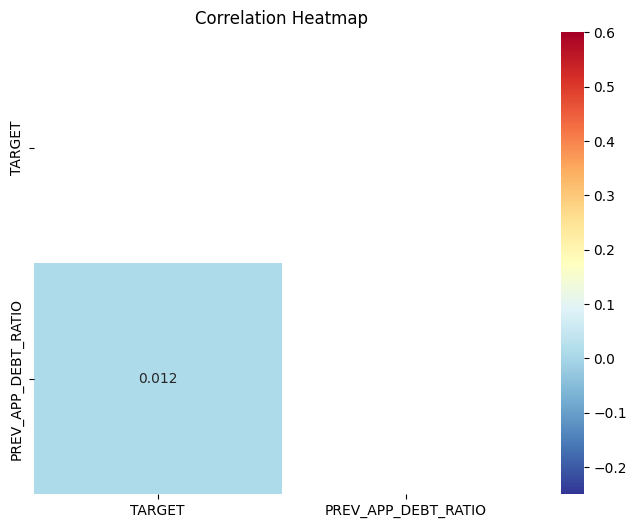

In [215]:
corrs = app_train[['TARGET', 'PREV_APP_DEBT_RATIO']].corr()
plt.figure(figsize = (8, 6))

mask = np.triu(np.ones_like(corrs, dtype=bool))

sns.heatmap(corrs, mask=mask, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### 3.3. Ratio Annuity/Credit 

Ce ratio mesure la proportion de l'annuité par rapport au montant total du crédit demandé, ce qui reflète l'intensité des paiements requis par rapport au montant emprunté.

In [216]:
# Annuity-to-Credit Ratio
app_train['ANNUITY_TO_CREDIT_RATIO'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_test['ANNUITY_TO_CREDIT_RATIO'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']

# Vérification
display(app_train[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_CREDIT', 'ANNUITY_TO_CREDIT_RATIO']].head())

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,ANNUITY_TO_CREDIT_RATIO
0,100002,24700.5,406597.5,0.060749
1,100003,35698.5,1293502.5,0.027598
2,100004,6750.0,135000.0,0.050000
3,100006,29686.5,312682.5,0.094941
4,100007,21865.5,513000.0,0.042623


## 4. Analyse de pertinence

Pour évaluer la pertinence des nouvelles variables, nous regardons leur distribution et leur corrélation avec la cible `TARGET`.

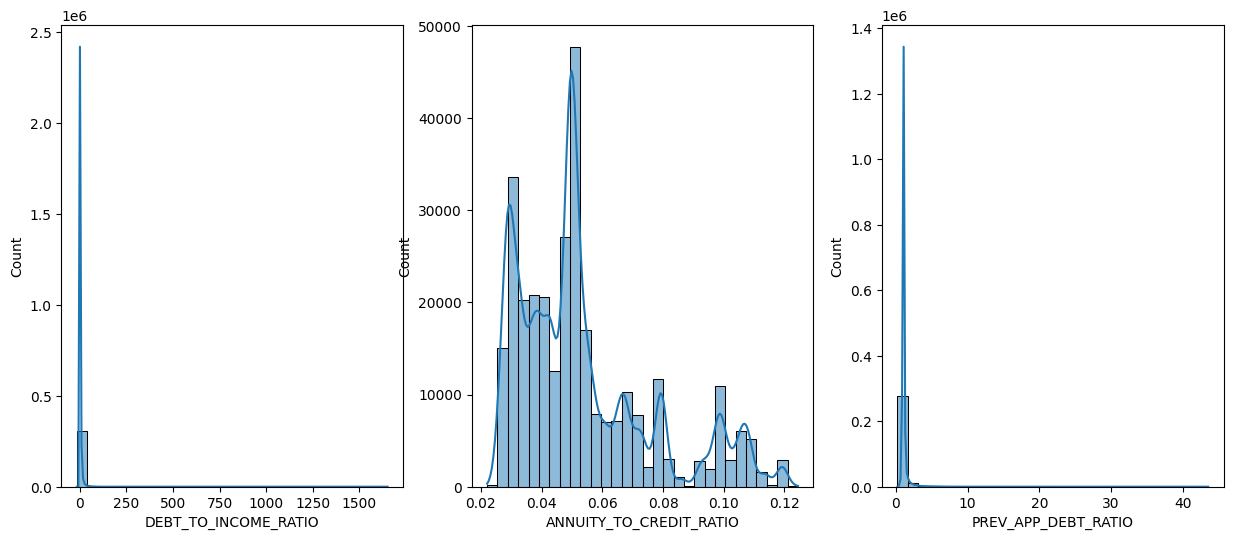

In [217]:
# Distribution des nouvelles variables
new_features = ['DEBT_TO_INCOME_RATIO', 'ANNUITY_TO_CREDIT_RATIO', 'PREV_APP_DEBT_RATIO']

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for i, feature in enumerate(new_features):
    sns.histplot(app_train[feature], kde=True, bins=30, ax=axes[i])

plt.show()

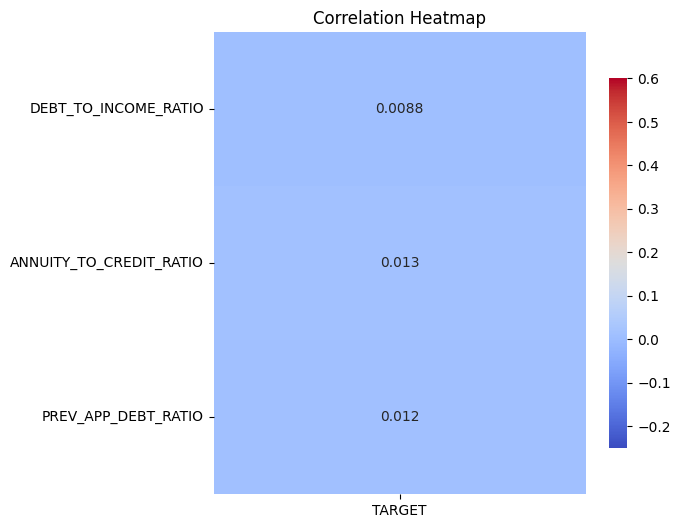

In [218]:
# Corrélation avec la cible
correlations = app_train[new_features + ['TARGET']].corr()['TARGET'].drop('TARGET')

plt.figure(figsize = (6, 6))

sns.heatmap(
    correlations.to_frame(),
    vmin = -0.25,
    annot = True,
    vmax = 0.6,
    cmap="coolwarm",
    cbar_kws={"shrink": .8},
)
plt.title('Correlation Heatmap');

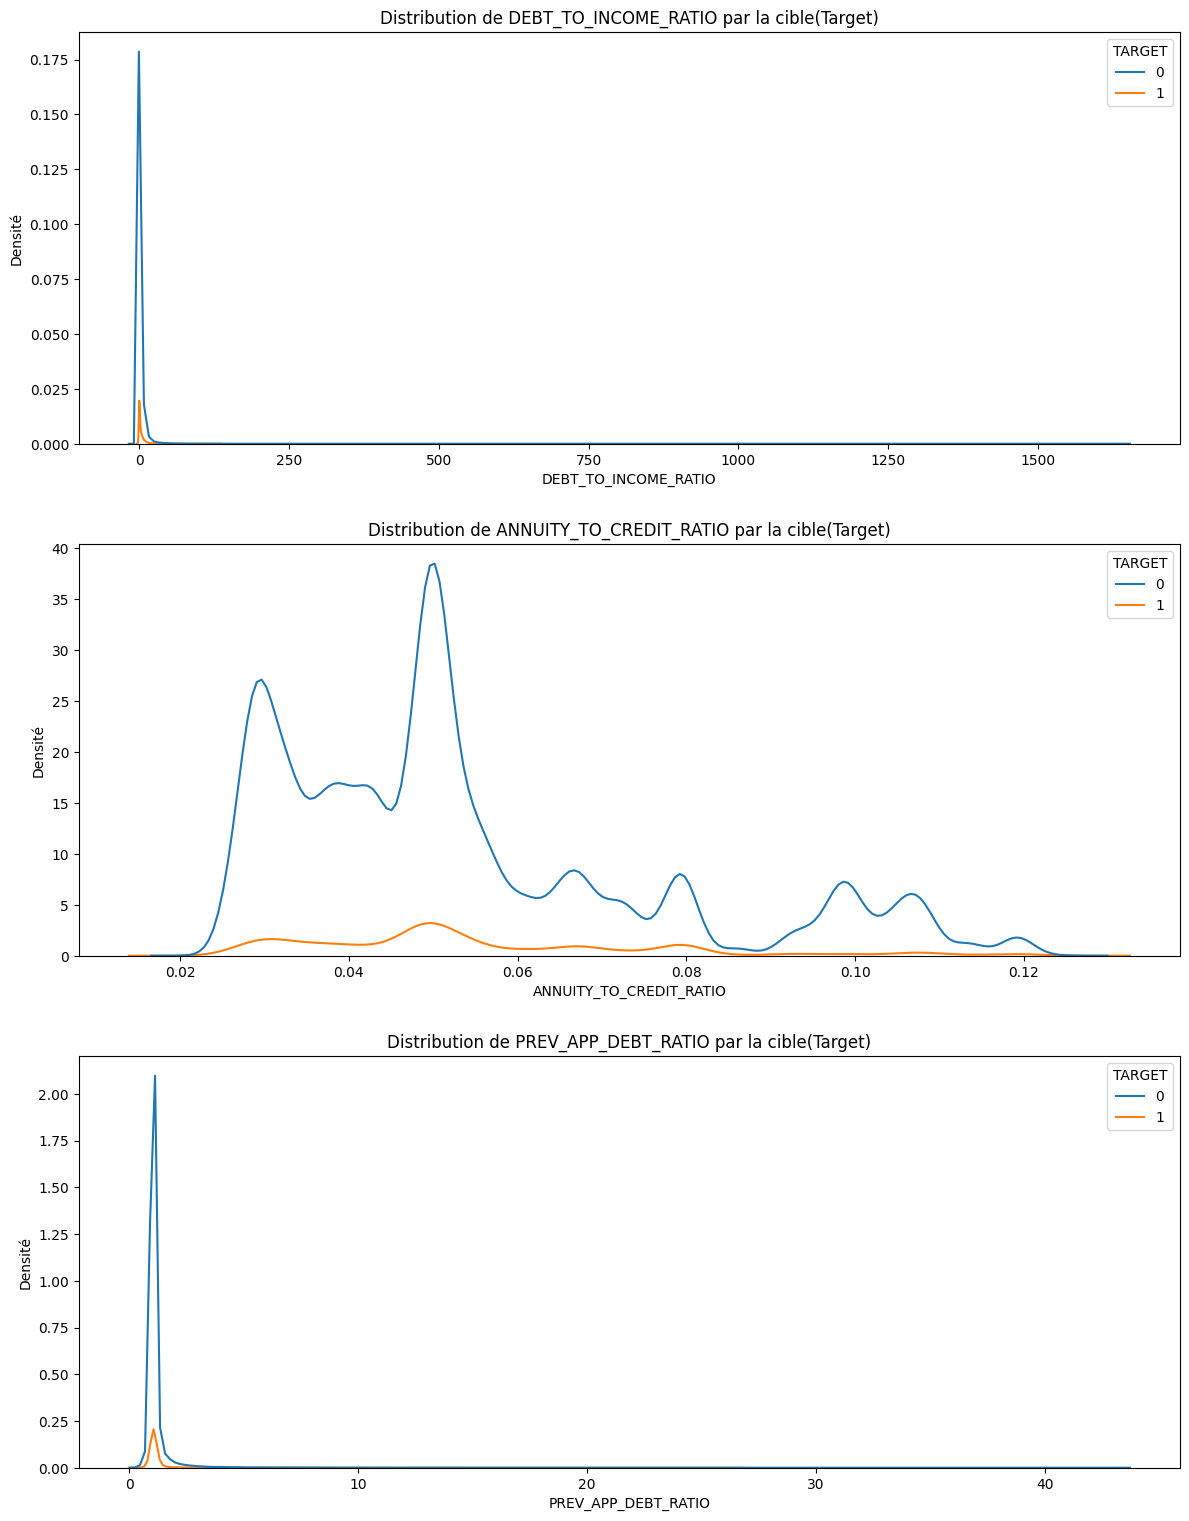

In [219]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(new_features):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(data=app_train, label = 'target == 0', x=feature, hue='TARGET')
    
    # Label the plots
    plt.title('Distribution de %s par la cible(Target)' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Densité');
    
plt.tight_layout(h_pad = 2.5)

## 5. Sauvegarde des jeux de données

In [220]:
app_train.to_csv(f"{folder_path}/cleaned_app_train.csv", encoding='utf-8', index=None)
app_test.to_csv(f"{folder_path}/cleaned_app_test.csv", encoding='utf-8', index=None)

## 5. Conclusion

Les nouvelles variables créées fournissent des informations pertinentes pour prédire le risque de défaut.  Les analyses montrent que les ratios créés (comme le **Debt-to-Income Ratio**) capturent bien les comportements financiers risqués des clients.

**Prochaines étapes :**
- Intégrer ces variables dans le modèle de prédiction.
- Tester leur importance avec des techniques comme SHAP ou l'attribution de feature importance.